In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

2024-05-15 11:29:10.232227: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 11:29:10.280836: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 11:29:10.280893: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 11:29:10.280922: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-15 11:29:10.288983: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 11:29:10.289779: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [22]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [23]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [8]:
import math

def plot_data(file, num_images, images, labels):
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)     
      plt.imshow(images[i].reshape(28,28))
      plt.xlabel(class_names[labels[i]])      
  plt.savefig(file)


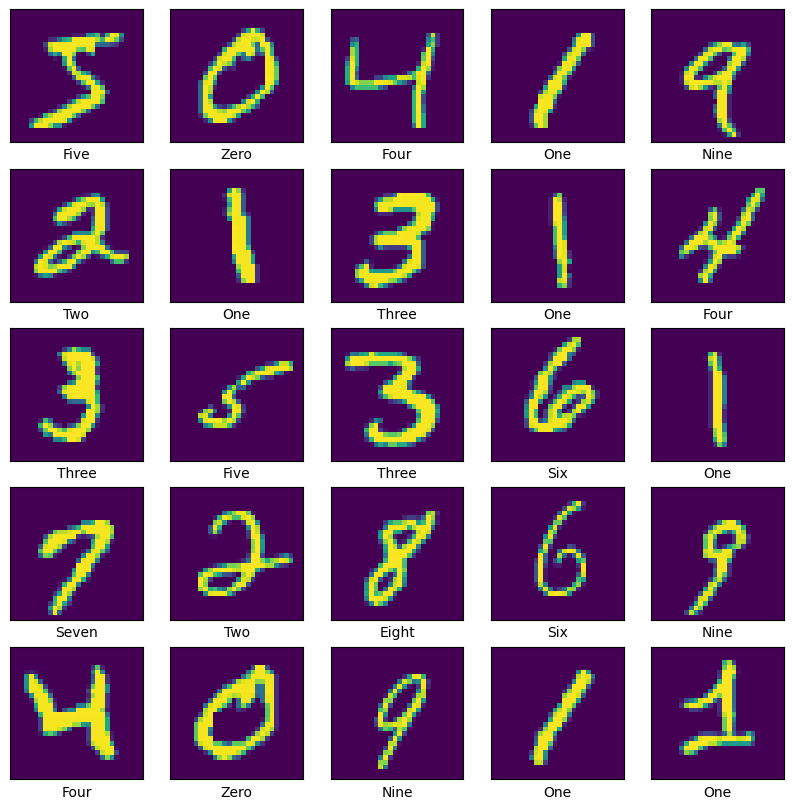

In [24]:
file = './before.png'
plot_data(file, 25, x_train, y_train)

In [25]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

encoding_dim = 32

In [26]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

In [28]:
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [29]:
autoencoder.compile(optimizer='adam', loss='mse')

In [30]:
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1377 - val_loss: 0.0262
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0102 - val_loss: 0.0038
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0011 - val_loss: 7.6995e-04
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 6.0401e-04 - val_loss: 4.7177e-04
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 3.8722e-04 - val_loss: 3.1651e-04
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 2.6757e-04 - val_loss: 2.2532e-04
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 1.9445e-04 - val_loss: 1.6720e-04
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 1.4651e-04 - val_loss: 1.2794e-04
Epoch 10/50
235/235 [==============================

In [32]:
generated = autoencoder.predict(x_test)

 96/313 [========>.....................] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


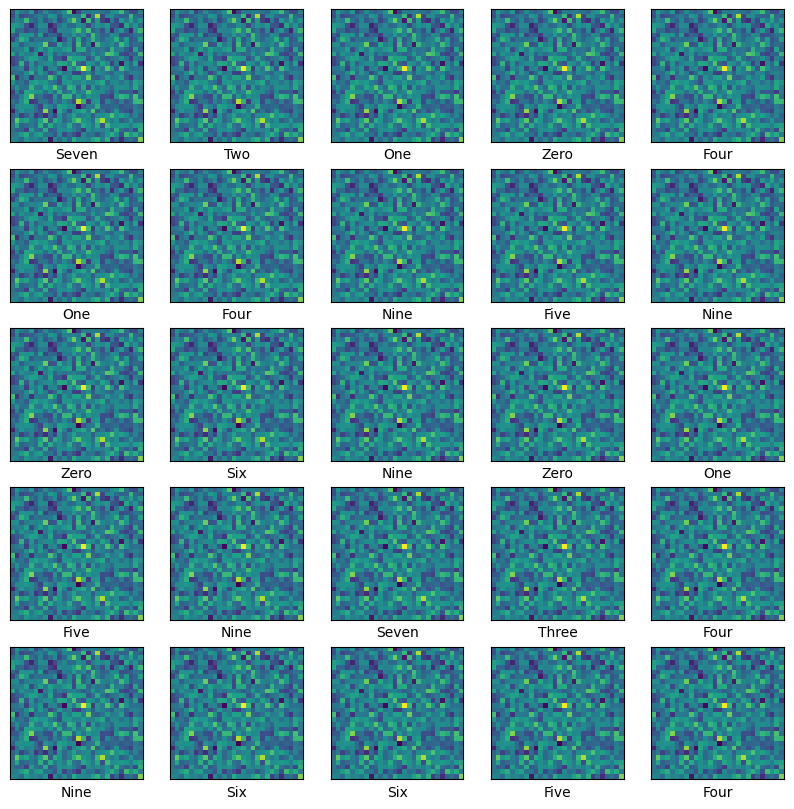

In [34]:
image = './generated.png'
plot_data(image, 25, generated, y_test)